<a href="https://colab.research.google.com/github/Seenuprime/Optical-Character-Recognition/blob/main/digit_letters_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!kaggle datasets download vaibhao/handwritten-characters

Dataset URL: https://www.kaggle.com/datasets/vaibhao/handwritten-characters
License(s): copyright-authors
 99% 1.61G/1.62G [00:20<00:00, 163MB/s]
100% 1.62G/1.62G [00:20<00:00, 84.2MB/s]


In [2]:
import zipfile

dir = zipfile.ZipFile('handwritten-characters.zip')
dir.extractall()
dir.close()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
train_data = tf.keras.preprocessing.image_dataset_from_directory('Train',
                                                                  color_mode='grayscale',
                                                                  label_mode='categorical',
                                                                  batch_size=32,
                                                                  image_size=(32, 32),
                                                                  shuffle=True)
val_data = tf.keras.preprocessing.image_dataset_from_directory('Validation',
                                                               color_mode='grayscale',
                                                               label_mode='categorical',
                                                               batch_size=32,
                                                               image_size=(32, 32),
                                                               shuffle=True)

Found 834036 files belonging to 39 classes.
Found 22524 files belonging to 39 classes.


In [5]:
class_names = train_data.class_names

In [6]:
print(class_names)

['#', '$', '&', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


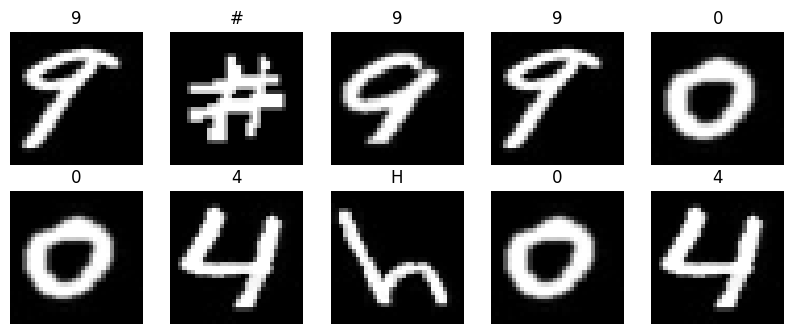

In [7]:
import random
plt.figure(figsize=(10, 10))
for image, label in train_data.take(1):
  for i in range(1, 11):
    plt.subplot(5, 5, i)
    rand_ind = random.randint(0, 10)
    plt.imshow(image[rand_ind], cmap='gray')
    plt.title(class_names[tf.argmax(label[rand_ind])])
    plt.axis(False)

In [8]:
AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.cache().prefetch(buffer_size=AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 1)),

    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.AveragePooling2D(2),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.AveragePooling2D(2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),  # Helps prevent overfitting

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')  # Output layer
])


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 8, 8, 32)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 39)                  │           2,535 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 150,039 (586.09 KB)

 Trainable params: 150,039 (586.09 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.fit(train_data,
          validation_data = val_data,
          epochs=5)

Epoch 1/5
26064/26064 ━━━━━━━━━━━━━━━━━━━━ 483s 18ms/step - accuracy: 0.8777 - loss: 0.4116 - val_accuracy: 0.9370 - val_loss: 0.2038
Epoch 2/5
26064/26064 ━━━━━━━━━━━━━━━━━━━━ 94s 4ms/step - accuracy: 0.9355 - loss: 0.1958 - val_accuracy: 0.9475 - val_loss: 0.1748
Epoch 3/5
26064/26064 ━━━━━━━━━━━━━━━━━━━━ 94s 4ms/step - accuracy: 0.9397 - loss: 0.1807 - val_accuracy: 0.9477 - val_loss: 0.1689
Epoch 4/5
26064/26064 ━━━━━━━━━━━━━━━━━━━━ 91s 3ms/step - accuracy: 0.9414 - loss: 0.1744 - val_accuracy: 0.9480 - val_loss: 0.1731
Epoch 5/5
26064/26064 ━━━━━━━━━━━━━━━━━━━━ 144s 4ms/step - accuracy: 0.9423 - loss: 0.1707 - val_accuracy: 0.9485 - val_loss: 0.1674


In [12]:
model.save("digit_char_model.keras")

In [13]:
model = tf.keras.models.load_model('digit_char_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


('P', 28)

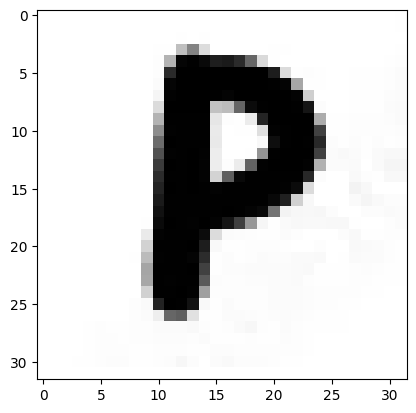

In [27]:
import cv2
import numpy as np

image = cv2.imread('P.png', 0)
image = cv2.resize(image, (32, 32))
plt.imshow(image, cmap='gray')

thresh = cv2.threshold(image, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)

final_image = np.expand_dims(thresh, axis=-1)
final_image = final_image.reshape(1, 32, 32, 1)
predicted = model.predict(final_image).argmax()
class_names[predicted], predicted